# Evaluation Trap

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import roundtrip_path_planner
import IPTestSuiteSS2023
fullBenchList = IPTestSuiteSS2023.benchList

In [2]:
Results = list()

## Basic PRM

basePRM [<class 'IPBasicPRM.BasicPRM'>, {'radius': 3, 'numNodes': 200}, <function basicPRMVisualize at 0x70e4169a5760>]
Planning: basePRM - Trap
Startpos: [[3, 20]]
Goalpos: [[10, 10]]


/home/moritz_s/anaconda3/envs/RPP/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


New Usedstart: [10, 10]
Startpos: [[10, 10]]
Goalpos: [[18, 18]]
New Usedstart: [18, 18]
Startpos: [[18, 18]]
Goalpos: [[20, 3]]
New Usedstart: [20, 3]
whole solution: ['-3-20-']
whole solution: ['-3-20-', '-15.120260656255601-6.63010562821549-', '-10-10-', '-13.406977467393714-6.213840793881534-', '-10-10-', '-13.3163301848818-2.1073136887148722-', '-10-10-', '-1.7624025816936482-11.343695189420359-', '-10-10-', '-19.086596747695403-21.773540289397097-', '-10-10-', '-17.05296245600076-2.9687051689382415-', '-10-10-', '-3.8856513679480953-15.206389207541005-', '-10-10-', '-9.672058663109308-10.416011313994012-', '-10-10-', '-19.909239906119325-5.698917402247842-', '-10-10-', '-10.875590092474317-16.170571049309494-', '-10-10-', '-1.9467693350913648-4.386849669990804-', '-10-10-']
whole solution: ['-3-20-', '-15.120260656255601-6.63010562821549-', '-10-10-', '-13.406977467393714-6.213840793881534-', '-10-10-', '-13.3163301848818-2.1073136887148722-', '-10-10-', '-1.7624025816936482-11.3

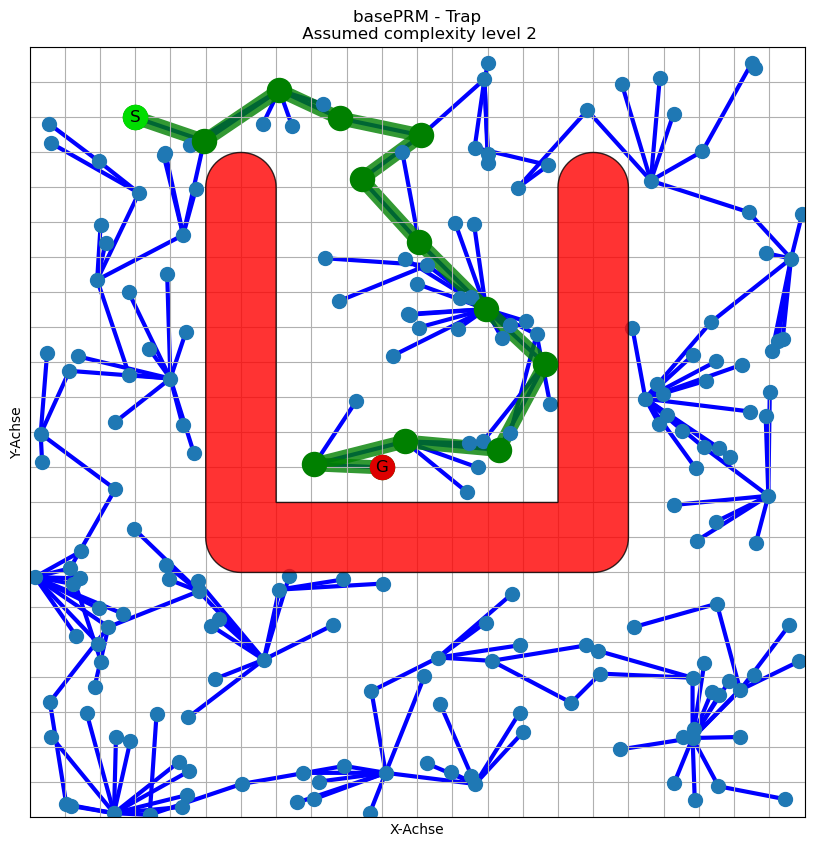

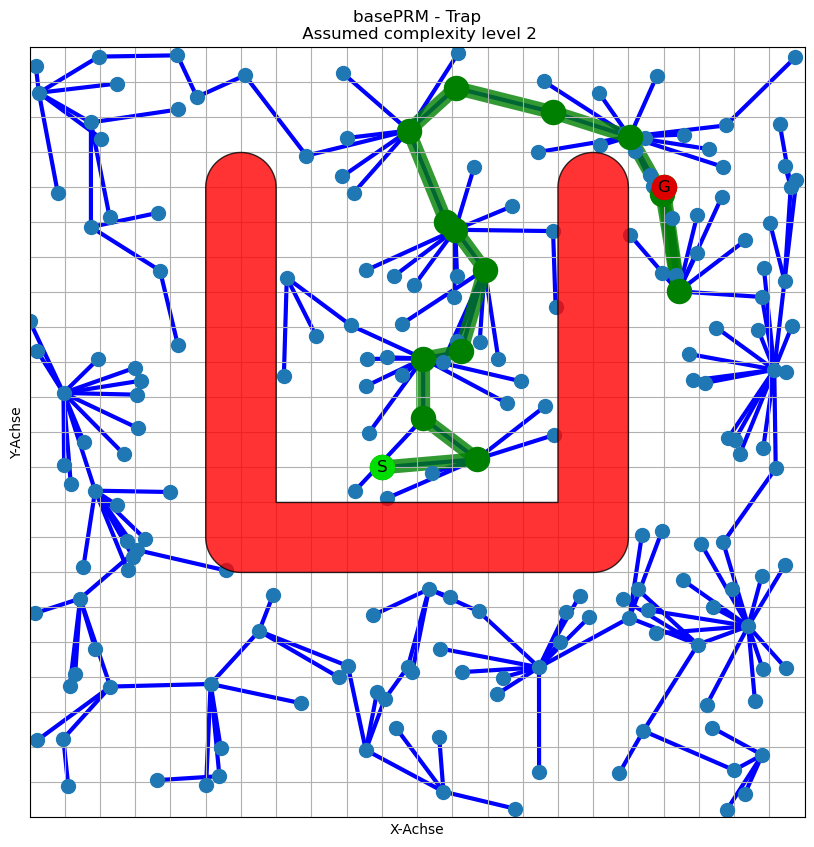

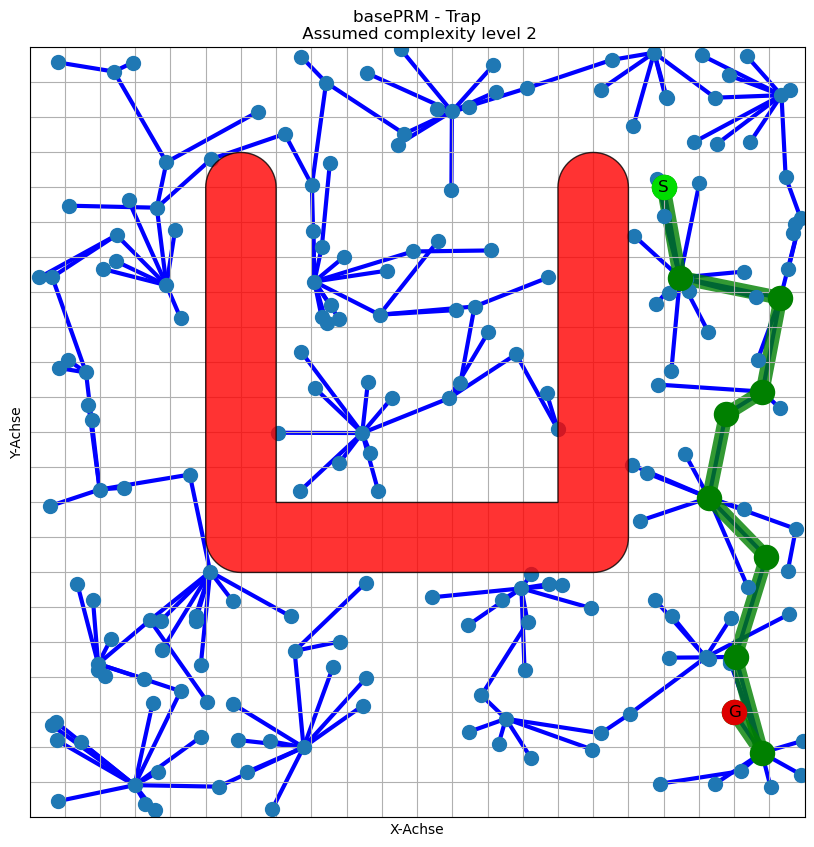

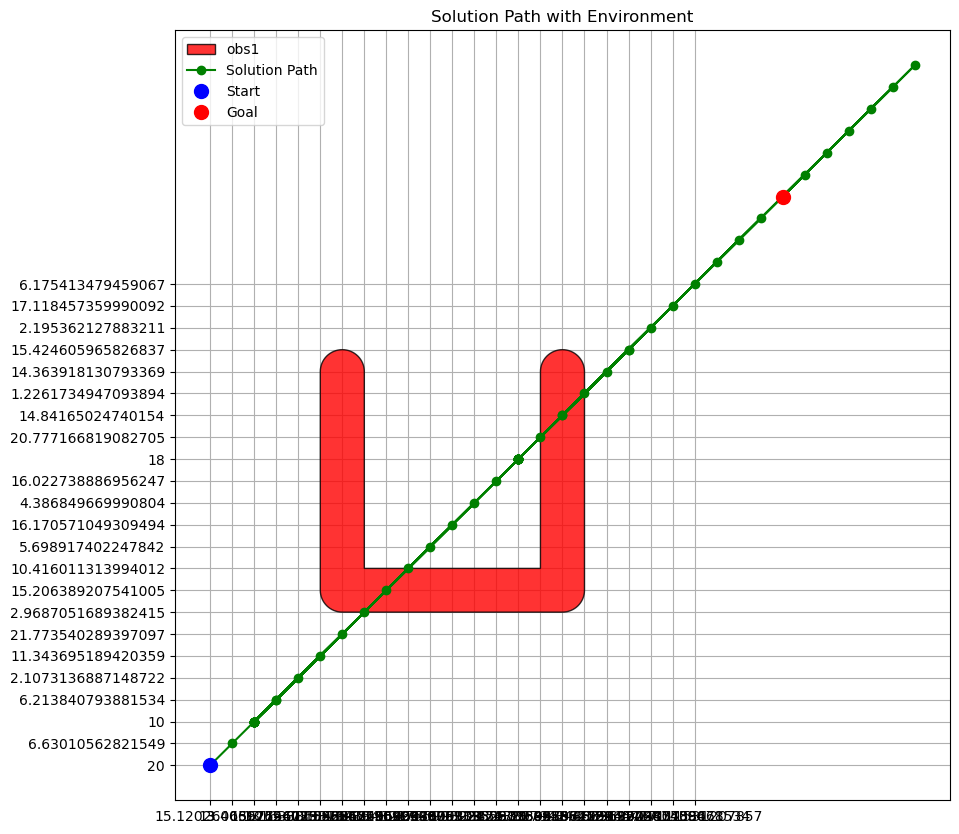

In [3]:
Environment_Test = fullBenchList[0]

StartList =[[3, 20]] 
GoalList = [[10, 10], [20,3], [18,18]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"basePRM")
Results.append(Planen.plan())


## Lazy PRM

lazyPRM [<class 'IPLazyPRM.LazyPRM'>, {'initialRoadmapSize': 10, 'updateRoadmapSize': 5, 'kNearest': 8}, <function lazyPRMVisualize at 0x70e4169a5d00>]
Planning: lazyPRM - Trap
Startpos: [[3, 20]]
Goalpos: [[10, 10]]
New Usedstart: [10, 10]
Startpos: [[10, 10]]
Goalpos: [[18, 18]]
Visualizing error for planner lazyPRM: 4
Exception details: 4
New Usedstart: [18, 18]
Startpos: [[18, 18]]
Goalpos: [[20, 3]]
Visualizing error for planner lazyPRM: 10
Exception details: 10
New Usedstart: [20, 3]
whole solution: ['-3-20-']


KeyError: 12

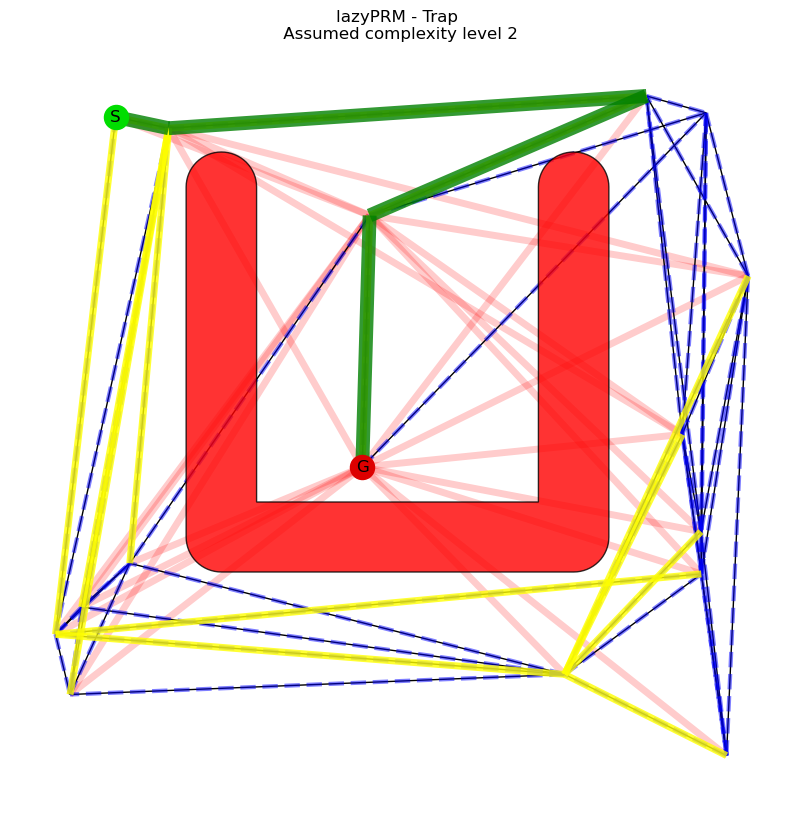

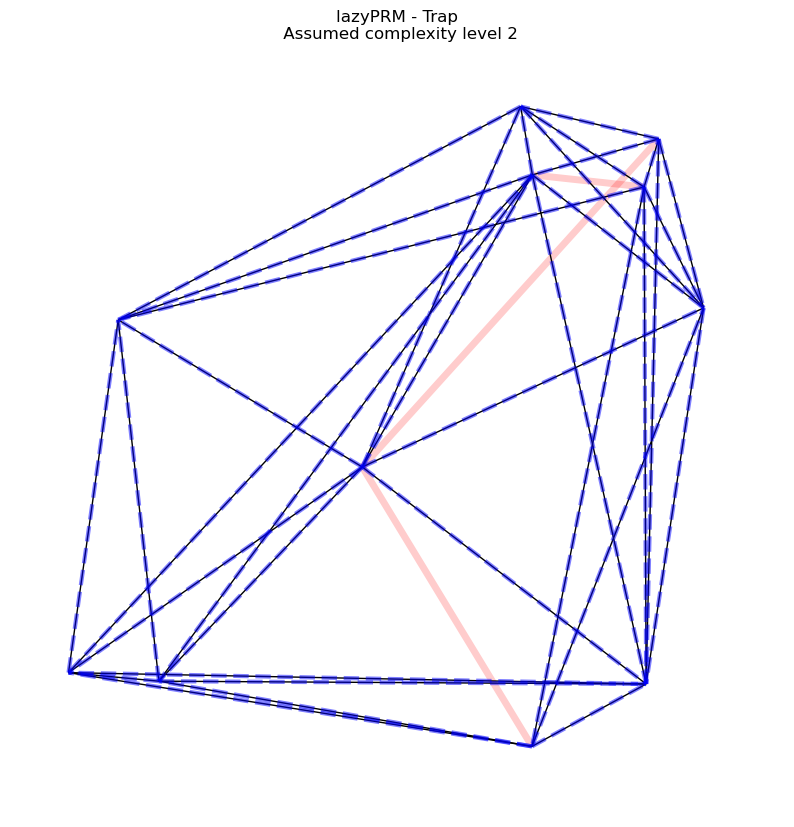

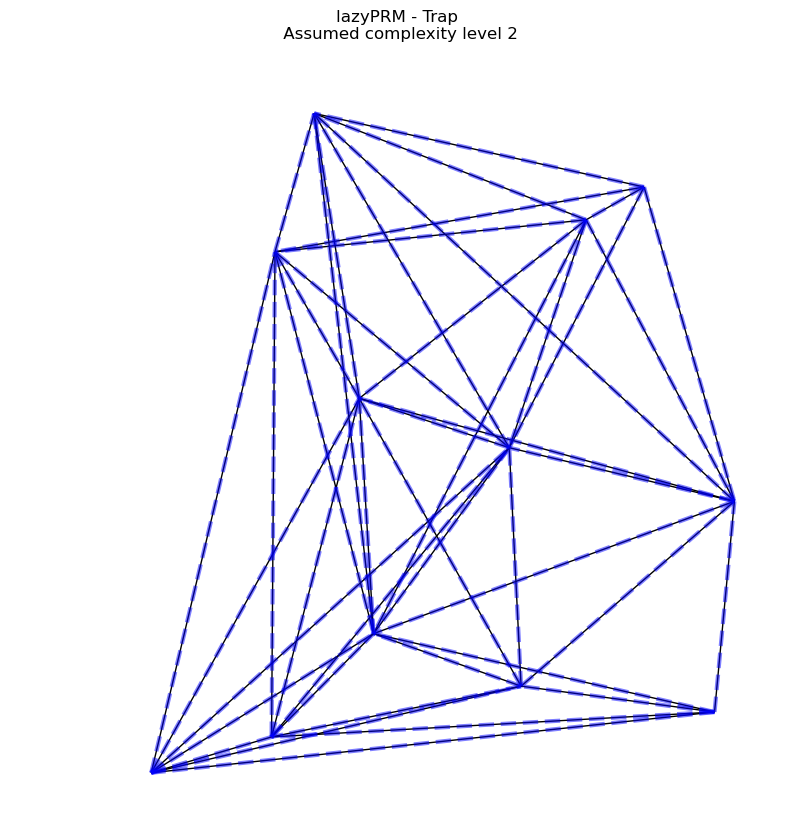

In [4]:
Environment_Test = fullBenchList[0]

StartList =[[3, 20]] 
GoalList = [[10, 10], [20,3], [18,18]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"lazyPRM")
Ergebnisse = Planen.plan()
# Results.append(Planen.plan())

In [5]:
Results.append(Ergebnisse)

## Visibility PRM

In [ ]:
Environment_Test = fullBenchList[0]

StartList =[[3, 20]] 
GoalList = [[10, 10], [20,3], [18,18]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"visibilityPRM")
Results.append(Planen.plan())

## Optimized Visibility PRM

In [ ]:
Environment_Test = fullBenchList[0]

StartList =[[3, 20]] 
GoalList = [[10, 10], [20,3], [18,18]]

# Planen = roundtrip_path_planner.Roundtrip_Path_Planner(Environment_Test.startList, Environment_Test.goalList, Environment_Test ,"basePRM")
Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"visibilityPRM_custom")
Results.append(Planen.plan())

In [ ]:
print(Results[3][0].solution)

In [ ]:
variables = {}

for i in range(len(Results[0])):
    variable_name = f"Durchlauf_{i+1}"
    variables[variable_name] = []

for i in range(len(Results[0])):
    for algorithm in Results:
        variables[f"Durchlauf_{i+1}"].append(algorithm[i])

# Ergebnis ausgeben
for name, liste in variables.items():
    print(f"{name}: {liste}")
 


In [10]:
for i in range(len(Results[0])):
    key = f"Durchlauf_{i+1}"
    if key in variables:
        # PerfMonitor aufrufen
        Durchlaufliste = variables[key]
        
    else:
        print(f"Key {key} does not exist in the dictionary.")

In [ ]:
for i in range(len(Results[0])):
    key = f"Durchlauf_{i+1}"
    if key in variables:
        # PerfMonitor aufrufen
        Durchlaufliste = variables[key]


        title = Results[0][0].benchmark.name
        pathLength = dict()
        planningTime = dict()
        roadmapSize  = dict()

        try:
            for result in Durchlaufliste:
                if result.benchmark.name == title:
                    #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                    pathLength[result.plannerFactoryName] = len(result.solution)
                    planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planPath"]
                    roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


            fig, ax = plt.subplots()

            width = 0.2

            ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
            ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
            ax.set_xticks(np.arange(len(pathLength.keys())) + width)
            ax.set_xticklabels(pathLength.keys())

            ax2 = ax.twinx()
            bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
            ax2.set_ylabel(title + " Planning time", color="y")

            # Add coloring and patterns on axis two
            hatches = ['x' if length==0 else '' for length in pathLength.values()]
            color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
            for i,thisbar in enumerate(bar.patches):
                thisbar.set_facecolor(color[i])
                thisbar.set_hatch(hatches[i])

            # Multiple axes 
            ax3 = ax.twinx()
            ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
            ax3.set_ylabel(title + " Roadmap size",  color="purple")
            ax3.spines['right'].set_position(('axes', 1.15))
            ax3.spines['right'].set_color("purple")
        except:
            pass


    else:
        print(f"Key {key} does not exist in the dictionary.")